In [120]:
import scanpy as sc
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

In [162]:
df=pd.read_csv('~/avm_obi_r100.csv')

In [163]:
df

Cell No.  Nucleus location (X)  Nucleus location (Y)  \
0             1                  2339                476617   
1             2                  4620                474098   
2             3                  4795                477999   
3             4                  4006                473768   
4             5                  4672                475027   
...         ...                   ...                   ...   
75837     75838                 62446                530964   
75838     75839                 60070                528570   
75839     75840                 63265                528903   
75840     75841                 61053                531066   
75841     75842                 62935                530389   

       Nucleus perimeter  GPNMB  PLVAP  P2RY12  TAGLN  TNF  CLDN5  ...  KCNT2  \
0                  153.0      0      0       0      1    0      0  ...      0   
1                   80.2      0      0       0      0    0      0  ...      0   
2                  113.9      0      0       0      0    0      0  ...      0   
3                  154.4      0      0       0      0    0      0  ...      0   
4                  189.8      0      0       0      2    0      0  ...      0   
...                  ...    ...    ...     ...    ...  ...    ...  ...    ...   
75837              450.9      0      0       0      1    0      7  ...      0   
75838              417.5      0      0       1      0    0      1  ...      0   
75839              493.1      0      0       0      0    1      0  ...      0   
75840              452.1      0      0       0      1    0     51  ...      0   
75841              505.4      0      1       0      5    0      2  ...      0   

       LYZ  CCL19  IL1R1  DCN  ALDH1A1  ACKR1  MFSD2A  PTGDS  COL1A2  
0        0      0      1    0        1      0       0      0       0  
1        0      0      0    0        0      0       0      0       0  
2        0      0      0    0        0      0       0      0       0  
3        0      0      0    0        0      0       0      0       0  
4        0      0      0    0        0      0       0      0       0  
...    ...    ...    ...  ...      ...    ...     ...    ...     ...  
75837    2      0      0    1        0      0       0      1       3  
75838    6      2      0    1        0      0       0      3       0  
75839    7      0      0    0        0      0       0      0       0  
75840   16      1      1    1        0      1      16      3       2  
75841    6      0      0    0        0      0       0      0       1  

[75842 rows x 23 columns]

In [164]:
df.iloc[:,  :]
adata = sc.AnnData(df.iloc[:, 4:])
adata.obs = df.iloc[:,: 4]

/home/chang/miniconda3/envs/venv/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [165]:
adata.obs.columns = ['Cell No.', 'x_pos', 'y_pos', 'perimeter']

In [166]:
adata.obs['n_counts']  = adata.X.sum(axis=1)
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)

In [167]:
adata

AnnData object with n_obs × n_vars = 75842 × 19
    obs: 'Cell No.', 'x_pos', 'y_pos', 'perimeter', 'n_counts', 'n_genes'

In [183]:
adata = adata[adata.obs['perimeter'] < 1000]

In [184]:
adata.obs['log_counts'] = np.log10(adata.obs['n_counts'])

Trying to set attribute `.obs` of view, copying.


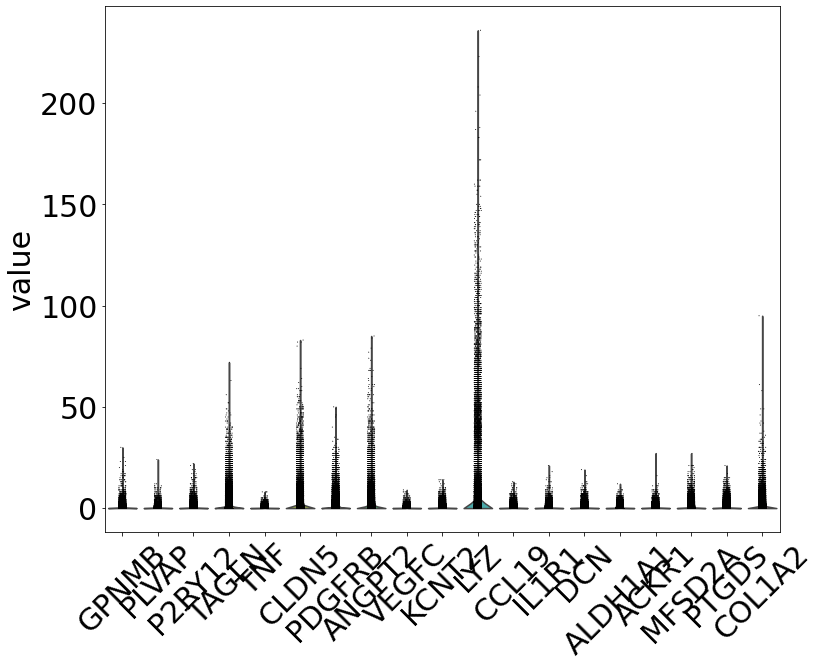

In [185]:
sc.pl.violin(adata, keys=adata.var_names, rotation=45)

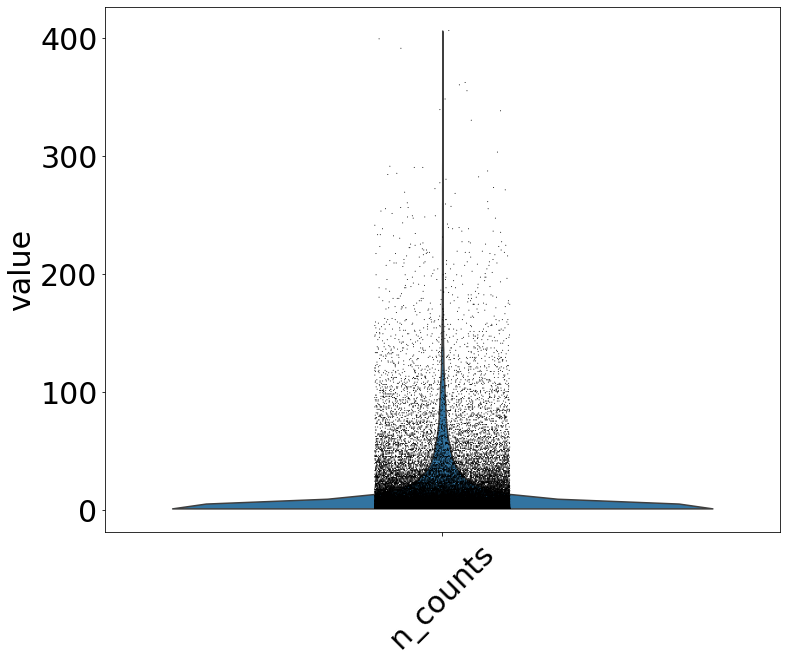

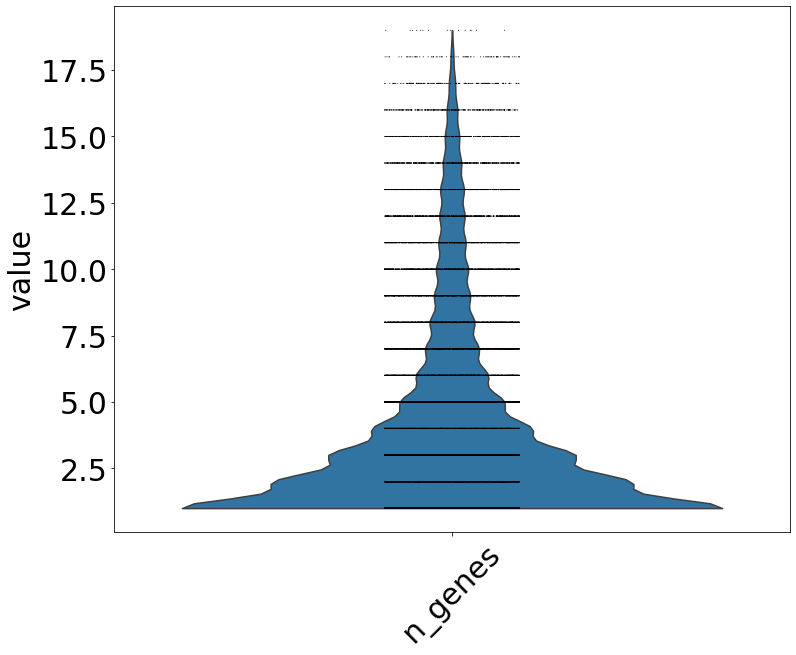

In [322]:
sc.pl.violin(adata, keys=['n_counts'], rotation=45)
sc.pl.violin(adata, keys=['n_genes'], rotation=45)

In [331]:
adata2=adata[adata.obs['n_counts'] > 10]
adata2=adata2[adata2.obs['n_counts'] < 200]
adata2=adata2[adata2.obs['n_genes'] < 15]
adata2

View of AnnData object with n_obs × n_vars = 14549 × 19
    obs: 'Cell No.', 'x_pos', 'y_pos', 'perimeter', 'n_counts', 'n_genes', 'log_counts'

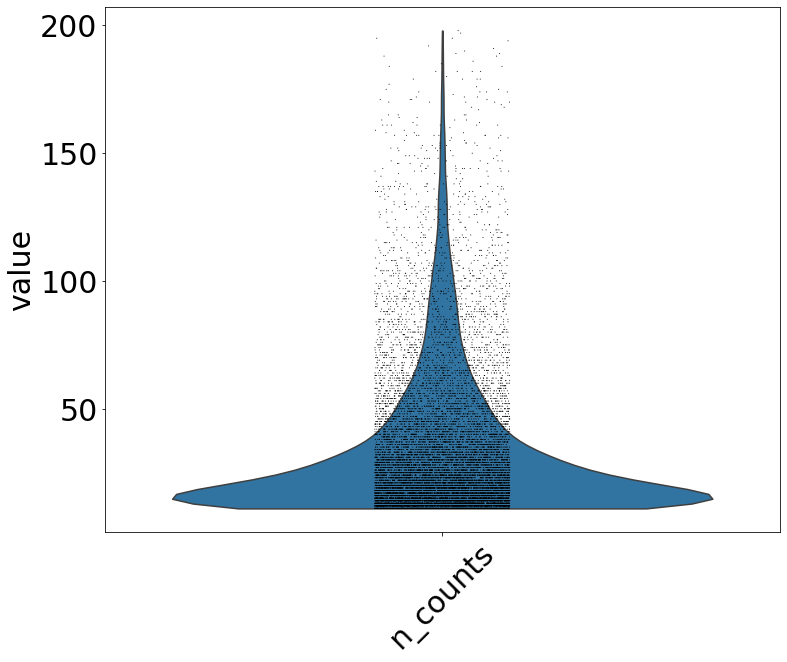

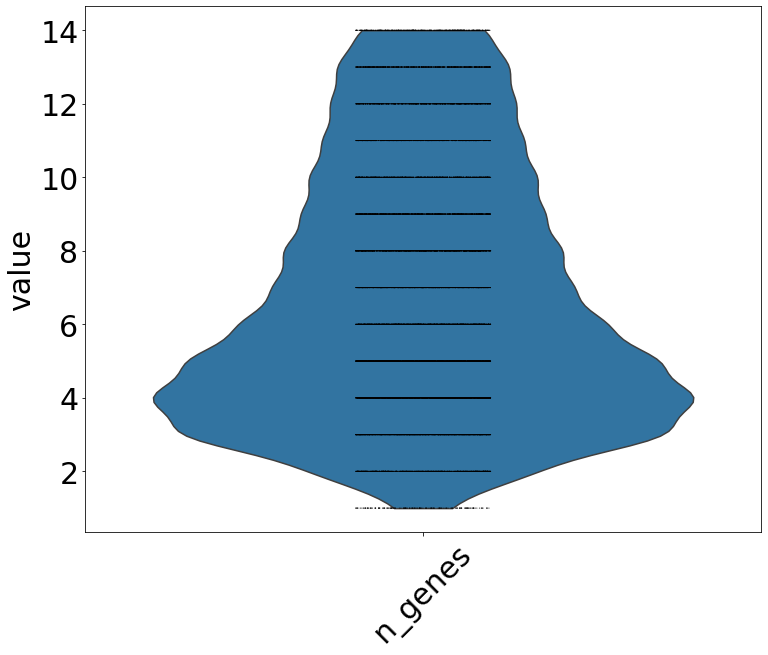

In [332]:
sc.pl.violin(adata2, keys=['n_counts'], rotation=45)
sc.pl.violin(adata2, keys=['n_genes'], rotation=45)

In [333]:
sc.pp.log1p(adata2)
sc.pp.scale(adata2)

/home/chang/miniconda3/envs/venv/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


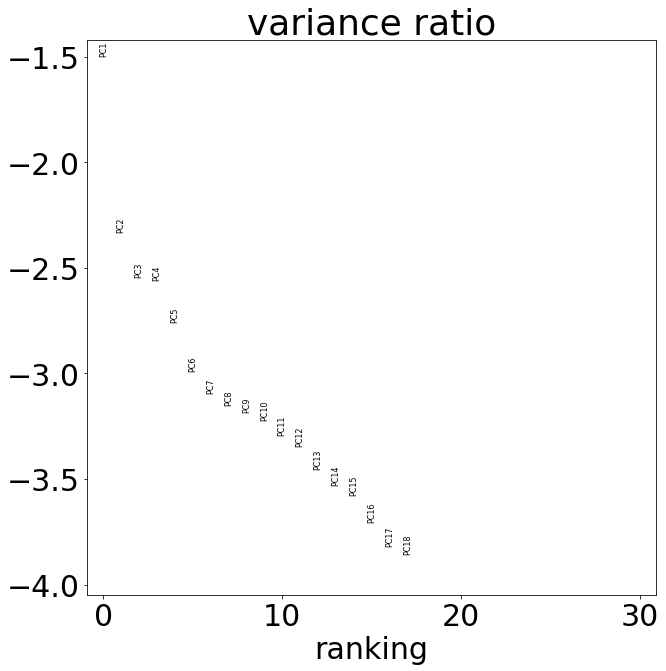

In [334]:
sc.tl.pca(adata2, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata2, log=True)

In [335]:
sc.pp.neighbors(adata2, n_neighbors=20, n_pcs=15)

In [336]:
sc.tl.leiden(adata2,
            resolution=.3)

In [337]:
sc.tl.umap(adata2, min_dist =1)

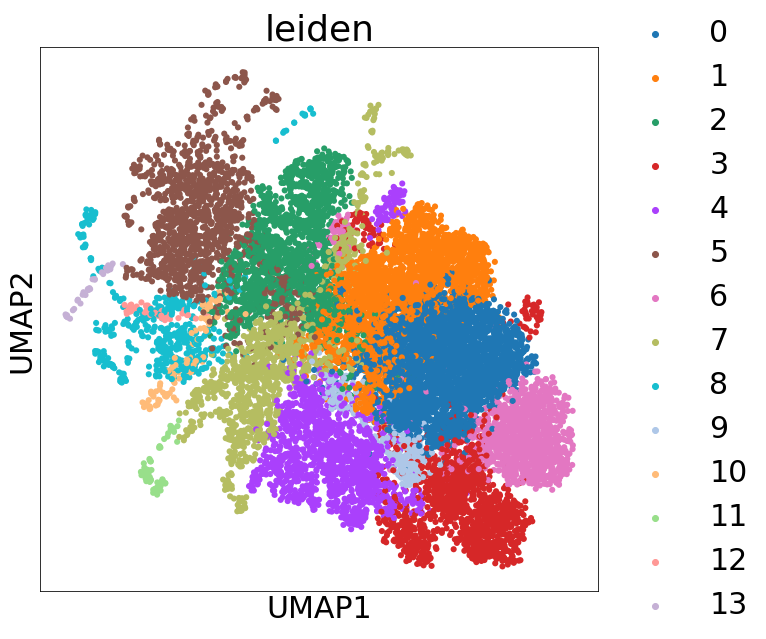

In [338]:
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['font.size'] = 30

sc.pl.umap(adata2,
          color=['leiden'],
    size=150,
    ncols=4,
           add_outline=False
)

In [339]:
gene_list = adata.var_names.tolist()
#gene_list

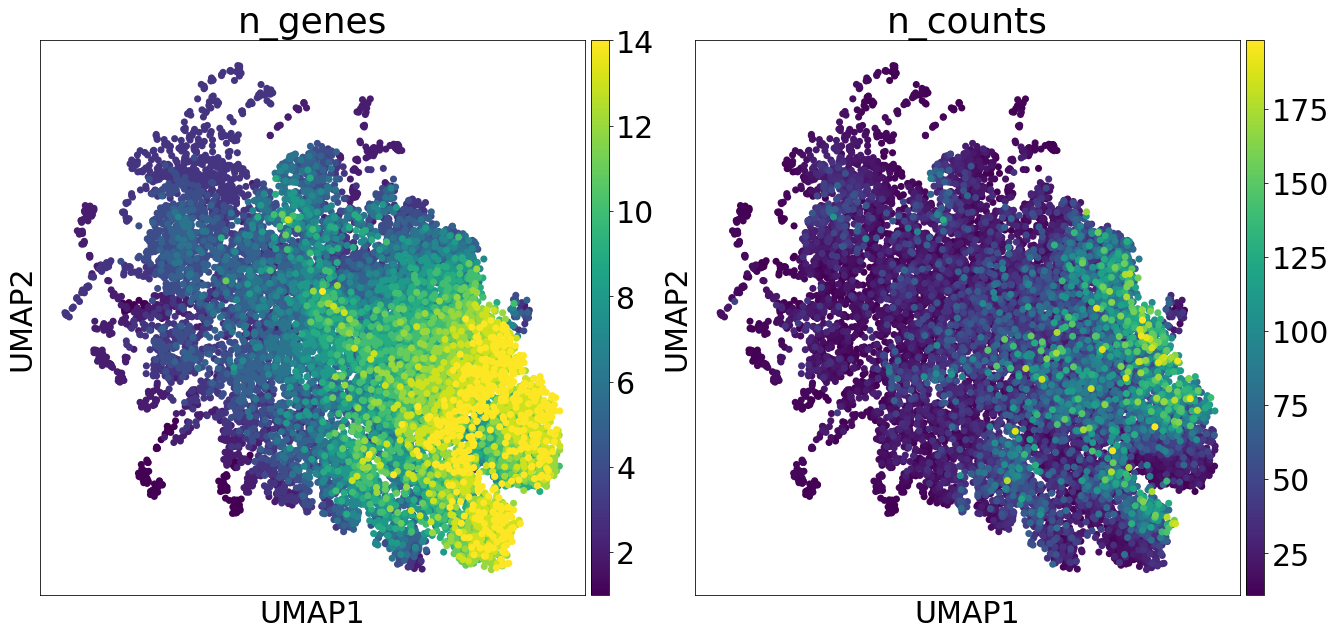

In [340]:
sc.pl.umap(adata2,
    color=['n_genes','n_counts'],
    size=200,
    ncols=2,)

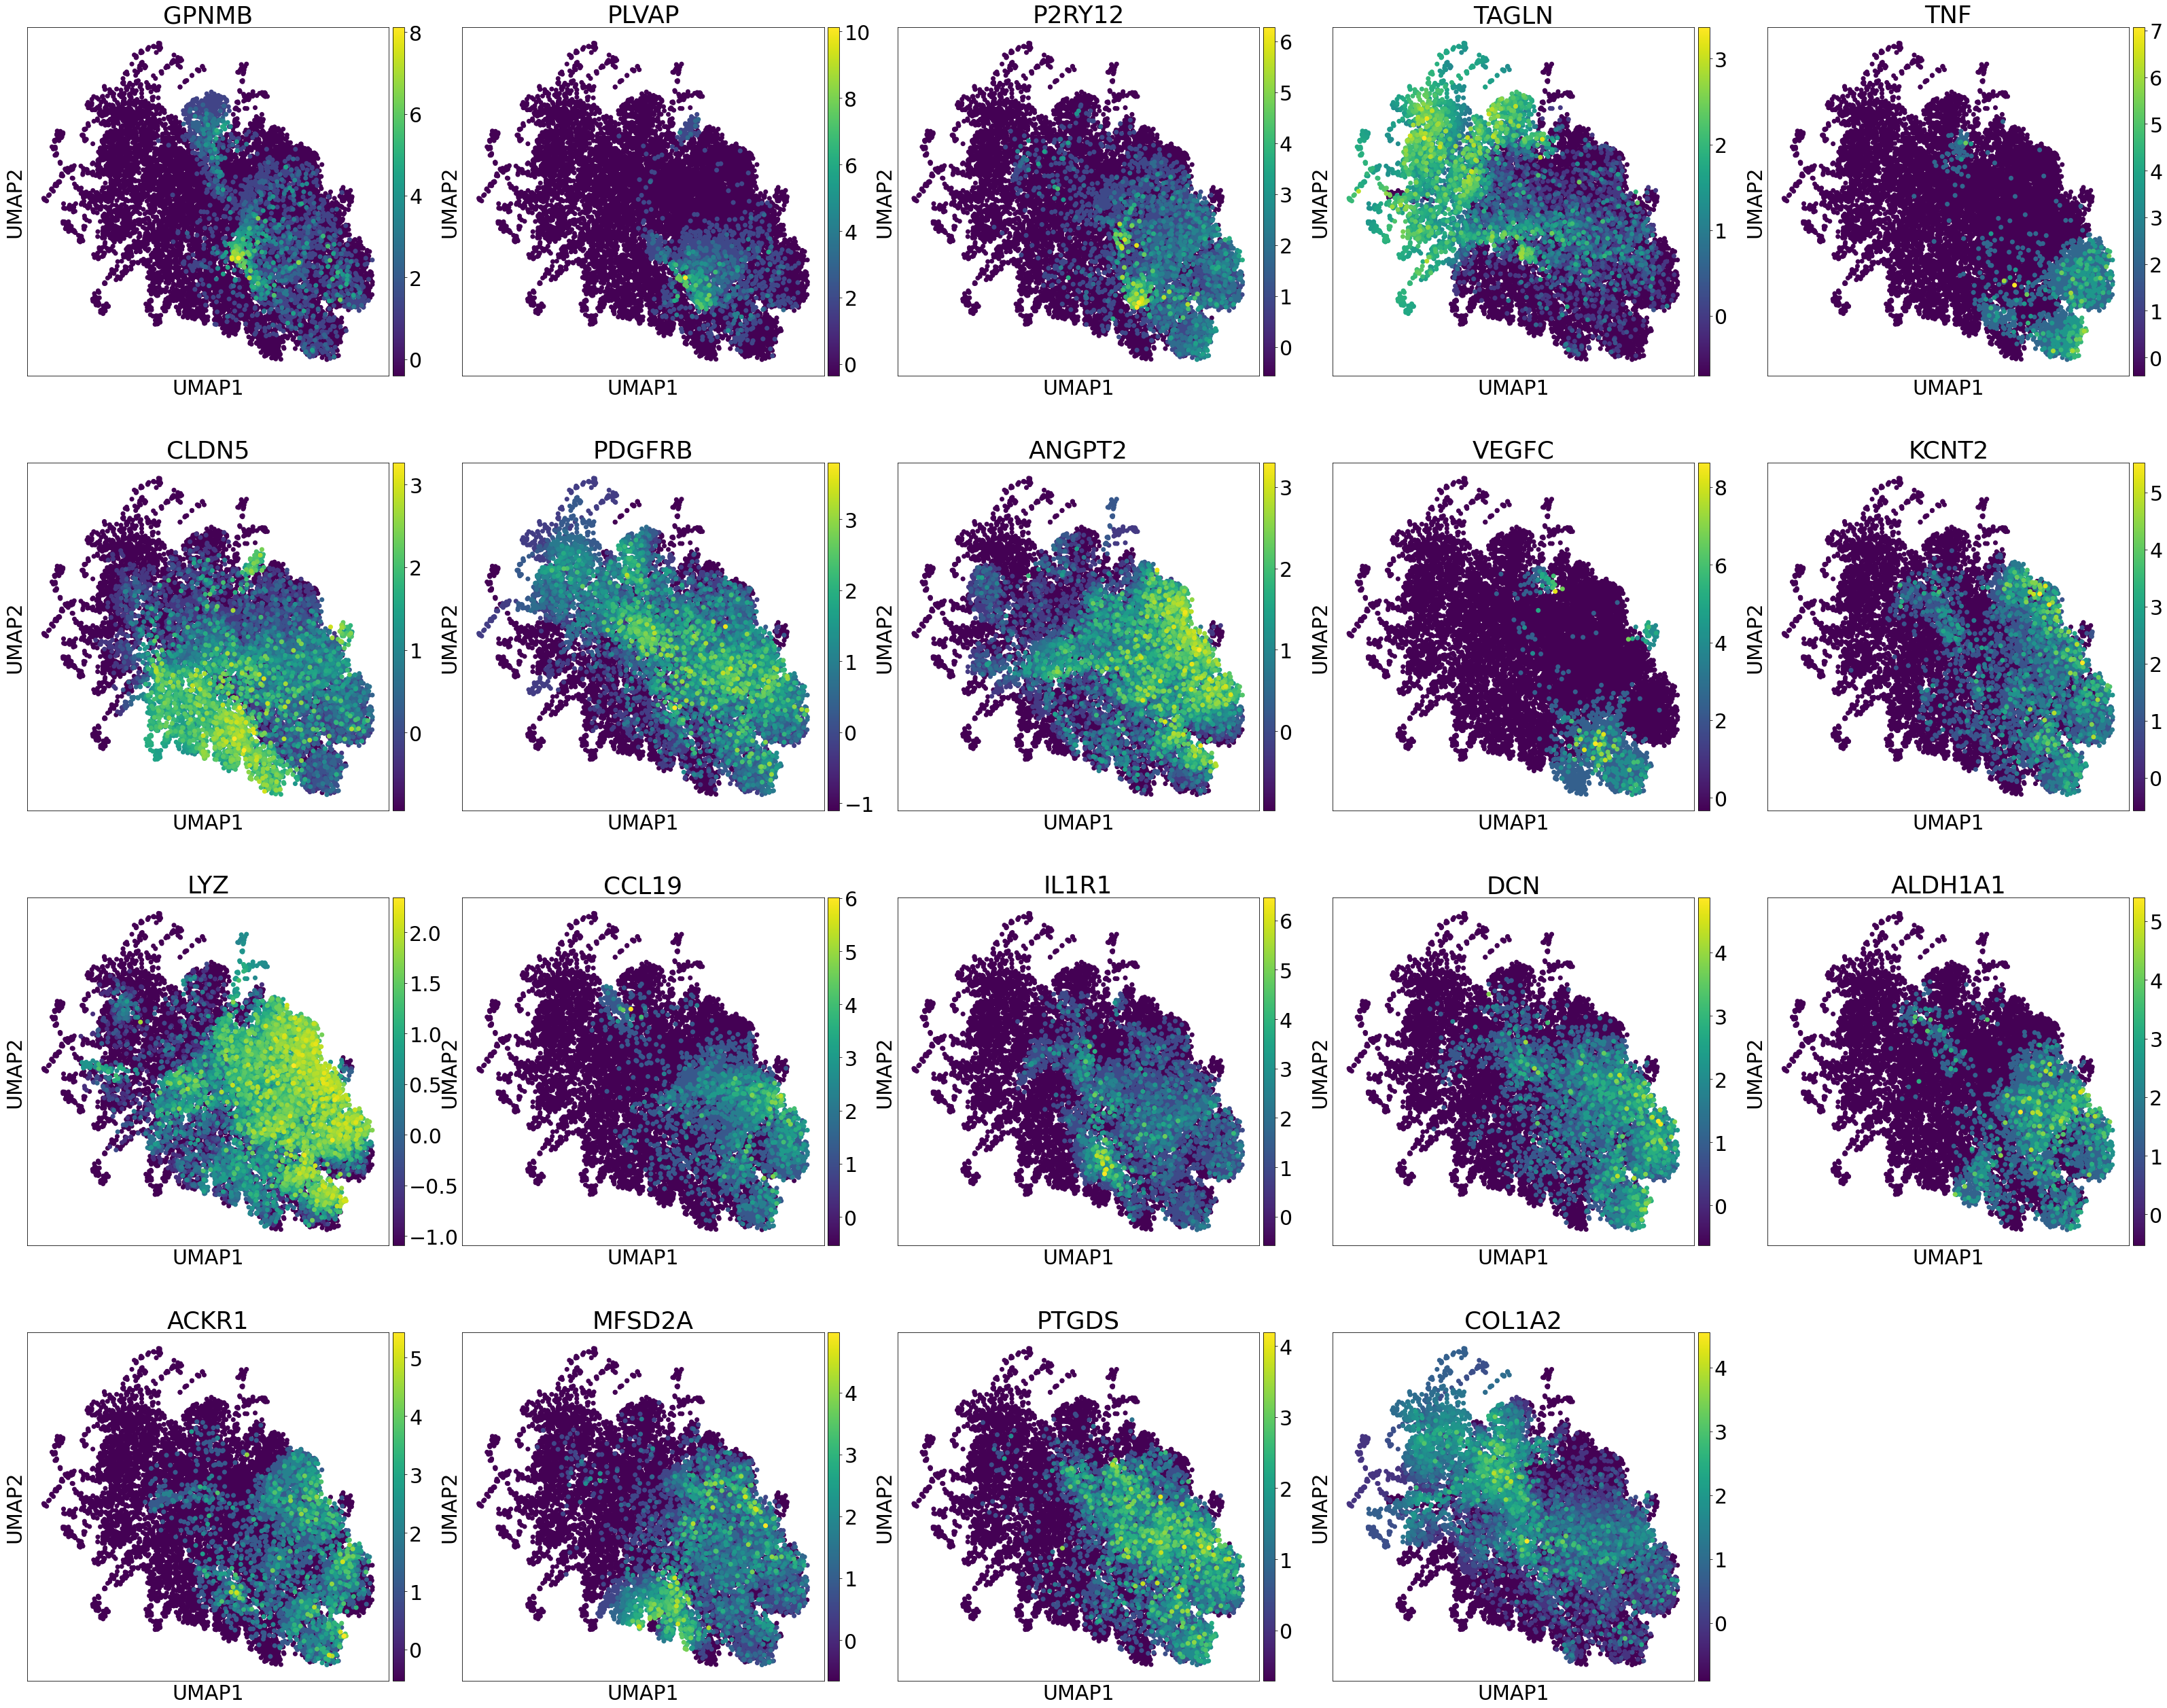

In [341]:
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['font.size'] = 30


sc.pl.umap(adata2,
    color=gene_list,
    size=200,
    ncols=5,
    #save='avm_feature_umap.svg'
    #color_map = mpl.cm.cividis
)

In [348]:
df=pd.DataFrame(adata2.uns['leiden_colors'],columns=['color'])
df['leiden'] = adata2.obs.leiden.cat.categories
df2 = pd.DataFrame(adata2.obs.leiden)
df2=df2.merge(df, on='leiden', how='left')
df2.index = adata2.obs.index
adata2.obs['color'] = df2['color']

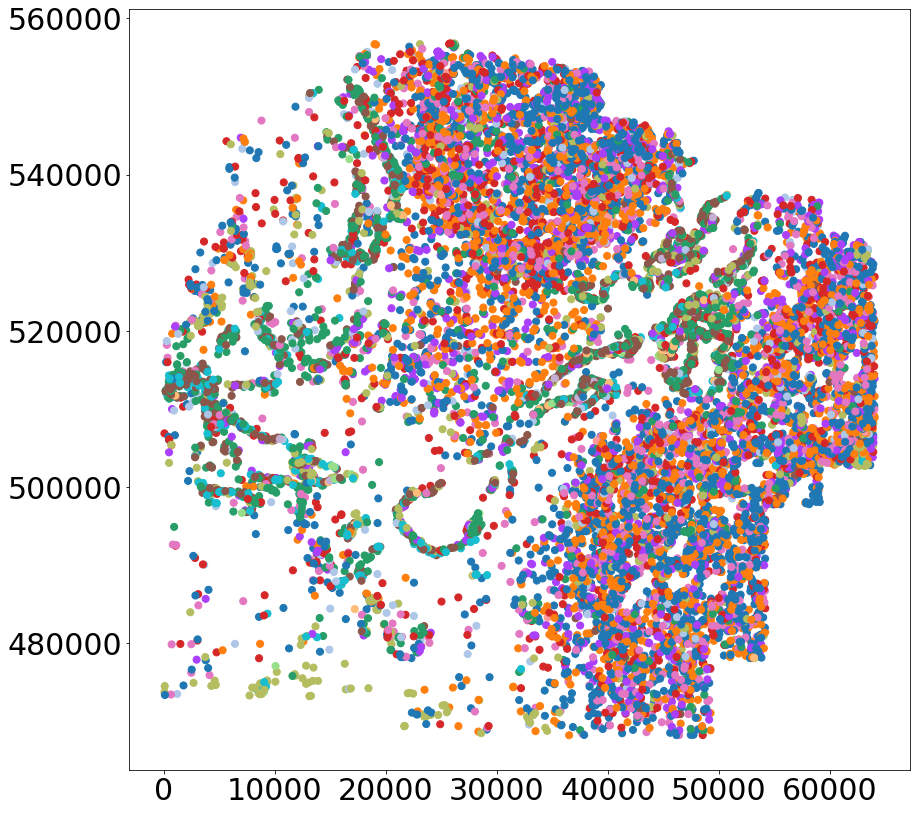

In [349]:
plt.figure(figsize=[14,14])
plt.scatter(x=adata2.obs.x_pos,
            y=adata2.obs.y_pos,
             c=adata2.obs.color,
            s=50,
           )